<a href="https://colab.research.google.com/github/Wickramasingh/Research-MA_Project/blob/main/youtube_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud.wordcloud import WordCloud

#2.Data Loading

In [14]:
file_path = 'Top Youtubers Dataset.csv'
youtube = pd.read_csv(file_path, encoding='latin1')

In [15]:
youtube.rename(columns = {"rank":"Rank","Youtuber":"Channel","subscribers":"Subscribers","Video views":"Views",
                          "video count":"Videos_uploaded","category":"Category","started":"Creation_year"},inplace = True)

In [16]:
youtube = youtube.set_index("Rank")

In [17]:
youtube.head(5)

,Channel,Subscribers,Video Views,Video Count,Category,Started
Rank,,,,,,
1,MrBeast,284000000,5.240290e+10,803,Entertainment,2012
2,T-Series,268000000,2.590000e+11,21237,Music,2006
3,YouTube Movies,181000000,0.000000e+00,0,Film & Animation,2015
4,Cocomelon - Nursery Rhymes,177000000,1.830000e+11,1188,Education,2006
5,SET India,174000000,1.650000e+11,139720,Shows,2006


#3.Data Cleaning and Preprocessing

In [4]:
youtube.isna().sum()   #Finding the sum of null values in each column


,0
Rank,0
Youtuber,0
Subscribers,0
Video Views,0
Video Count,0
Category,43
Started,0


In [5]:
youtube.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,1000.0,5.005000e+02,2.888194e+02,1.0,2.507500e+02,5.005000e+02,7.502500e+02,1.000000e+03
Subscribers,1000.0,2.662430e+07,2.006768e+07,14500000.0,1.670000e+07,2.080000e+07,2.927500e+07,2.840000e+08
Video Views,1000.0,1.330120e+10,1.604392e+10,0.0,5.272817e+09,9.790981e+09,1.626453e+10,2.590000e+11
Video Count,1000.0,1.246128e+04,4.309875e+04,0.0,5.185000e+02,1.242000e+03,3.981000e+03,3.861950e+05
Started,1000.0,2.013604e+03,4.609168e+00,1970.0,2.011000e+03,2.014000e+03,2.017000e+03,2.024000e+03


In [6]:
#Dropping the null values in a youtube dataframe in the category column

youtube.dropna(axis = 0,subset = ["Category"],inplace= True)

#reset_index is used to adjust the index without any gaps in between the index values

youtube = youtube.reset_index(drop=True)

In [7]:
print(youtube.columns)


Index(['Rank', 'Youtuber', 'Subscribers', 'Video Views', 'Video Count',
       'Category', 'Started'],
      dtype='object')


In [8]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         957 non-null    int64  
 1   Youtuber     957 non-null    object 
 2   Subscribers  957 non-null    int64  
 3   Video Views  957 non-null    float64
 4   Video Count  957 non-null    int64  
 5   Category     957 non-null    object 
 6   Started      957 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 52.5+ KB


In [9]:
# Replacing the object value containing "," with "" in columns Subscribers, Video Views, and Video Count
youtube["Subscribers"] = [str(value).replace(",", "") for value in youtube["Subscribers"]]
youtube["Video Views"] = [str(value).replace(",", "") for value in youtube["Video Views"]]
youtube["Video Count"] = [str(value).replace(",", "") for value in youtube["Video Count"]]

# Converting to float first to handle floating-point numbers, then converting to int
youtube["Subscribers"] = youtube["Subscribers"].astype("int64")
youtube["Video Views"] = youtube["Video Views"].astype("float64").astype("int64")
youtube["Video Count"] = youtube["Video Count"].astype("int64")

In [10]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         957 non-null    int64 
 1   Youtuber     957 non-null    object
 2   Subscribers  957 non-null    int64 
 3   Video Views  957 non-null    int64 
 4   Video Count  957 non-null    int64 
 5   Category     957 non-null    object
 6   Started      957 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 52.5+ KB


In [11]:
#Modifying the dataset to that contains values in views column rather than 0

youtube = youtube[youtube["Video Views"]!=0]

#Reseting index so that there won't be any gap in between index values

youtube = youtube.reset_index(drop=True)

#**Data Exploration**

#1.Top 10 YouTube Channels by Subscribers

In [18]:
# Extract Channel and Subscribers columns
New_data1 = youtube[["Channel", "Subscribers"]].copy()

# Set the Channel as the index
New_data = New_data1.set_index("Channel")

# Sort values based on Subscribers
New_data1 = New_data1.sort_values(by=["Subscribers"], ascending=False)

# Get the top 10 entries
New_data1 = New_data1.head(10)

# Reset the index (removing the Channel index)
New_data1.index = range(1, len(New_data1) + 1)

New_data1


,Channel,Subscribers
1,MrBeast,284000000
2,T-Series,268000000
3,YouTube Movies,181000000
4,Cocomelon - Nursery Rhymes,177000000
5,SET India,174000000
6,Kids Diana Show,123000000
7,Music,121000000
8,Vlad and Niki,120000000
9,Like Nastya,116000000
10,PewDiePie,111000000


Plotting bar chart between Channel and Subscribers


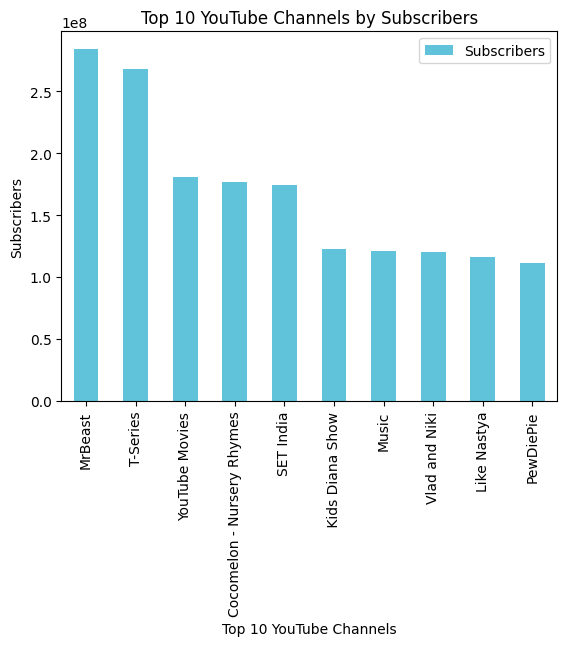

In [19]:
# Sort the DataFrame by Subscribers in descending order and select the top 10
top_10_channels = youtube.nlargest(10, 'Subscribers')

# Plotting the bar graph using the provided template
top_10_channels.plot(
    x='Channel',
    y='Subscribers',
    xlabel='Top 10 YouTube Channels',
    ylabel='Subscribers',
    title='Top 10 YouTube Channels by Subscribers',
    kind='bar',
    color='#61C3D9'
)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)
plt.show()


#2. Top 10 categories with their channel count

In [20]:
#Based on each category how many channels are created are found out.
Category_values = youtube["Category"].value_counts().head(10)

Category_values

,count
Category,
Entertainment,269
Music,172
People & Blogs,152
Gaming,92
Comedy,71
Film & Animation,45
Education,41
News & Politics,28
Howto & Style,28


<Axes: title={'center': 'No of channels based on category'}, xlabel='Category', ylabel='Count'>

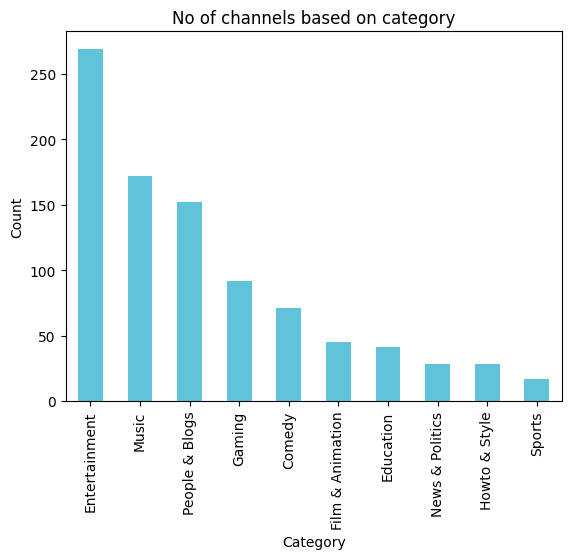

In [21]:
Category_values.plot(xlabel = "Category",ylabel = "Count",title = "No of channels based on category",
                     kind = "bar",color = "#61C3D9")

#3. Channel creations count every year

In [22]:
# Create a new DataFrame with counts of channels created each year
creation = youtube["Started"].value_counts().reset_index()

# Rename columns for clarity
creation.columns = ["Year", "Count"]

# Filter to only include years 2005 and later
creation = creation[creation['Year'] >= 2005]

# Sort the DataFrame by Year
creation.sort_values(by="Year", inplace=True)

# Reset the index for cleaner display
creation.reset_index(drop=True, inplace=True)

# Display the final DataFrame
print("Channel Creation Count per Year (from 2005):")
print(creation)



Channel Creation Count per Year (from 2005):
    Year  Count
0   2005     18
1   2006     60
2   2007     38
3   2008     41
4   2009     47
5   2010     35
6   2011     73
7   2012     70
8   2013     80
9   2014    100
10  2015     85
11  2016     77
12  2017     72
13  2018     53
14  2019     37
15  2020     47
16  2021     53
17  2022      7
18  2023      5
19  2024      1


Plotting bar chart between Creation_year and No. of channels created in a year

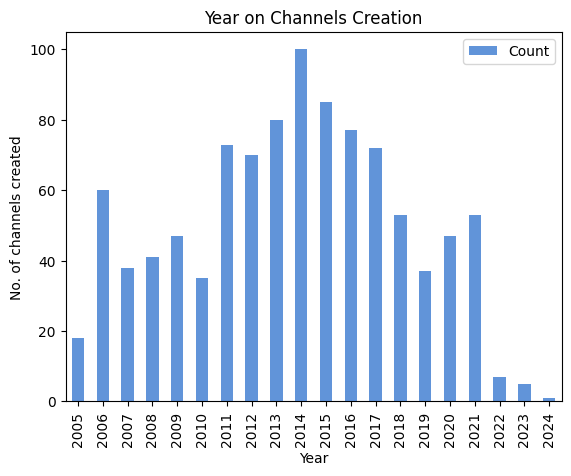

In [23]:
# Plotting the bar chart
creation.plot(
    y="Count",
    xlabel="Year",
    ylabel="No. of channels created",
    title="Year on Channels Creation",
    kind="bar",
    color='#6194D9'
)
# Set x-ticks to show the actual year values
plt.xticks(ticks=range(len(creation)), labels=creation['Year'], rotation=90)
# Show the plot
plt.show()

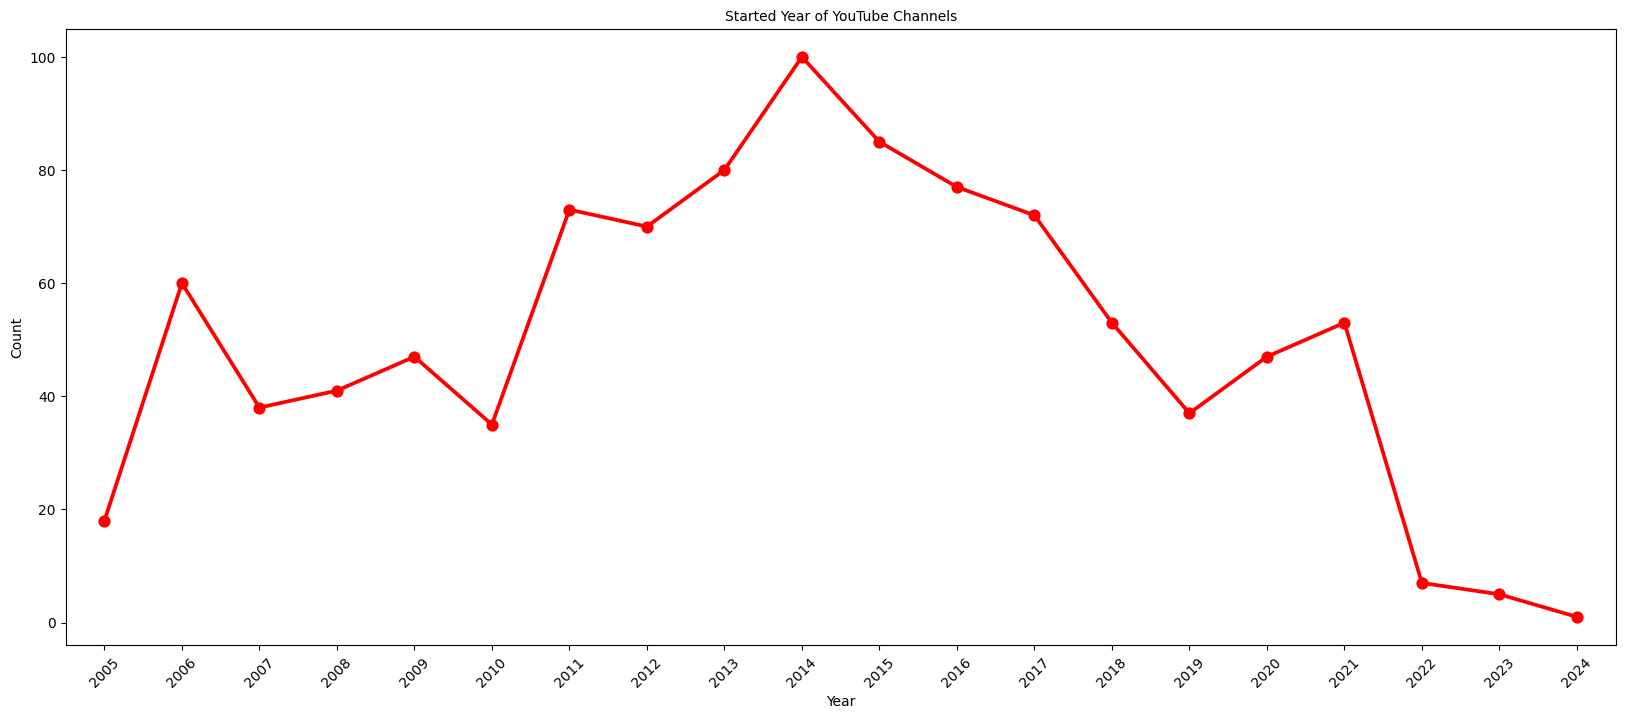

In [24]:
year = youtube['Started'].value_counts().sort_index()
year = year[year.index >= 2005]
plt.figure(figsize=(20, 8))
sns.pointplot(x=year.index, y=year.values, color='red')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Started Year of YouTube Channels', size=10, color='black')
plt.xticks(rotation=45)
plt.show()

# 4. Top 10 highest videos uploaded channels

In [25]:
New_data = youtube[["Channel","Video Count"]]
#Index has been updated to Channel
New_data= New_data.set_index("Channel")
#Sorting of values based on Videos_uploaded is done
New_data.sort_values(by=["Video Count"], ascending=[False], inplace=True)
#Top 10 of the New_dats is sorted and assigned to same Dataframe
New_data = New_data.head(10)
#Index name has been removed
New_data.index.name = ""
New_data

,Video Count
,
TV9 Bharatvarsh,386195
ABP NEWS,383685
Aaj Tak,368830
GMA Integrated News,333517
KOMPASTV,314530
IndiaTV,306269
News 24,296796
THAIRATH TV Originals,282241
News18 India,260736


Plotting bar chart between Channel and number of videos uploaded

<Axes: title={'center': 'Top 10 channels with highest video uploads'}, ylabel='Count'>

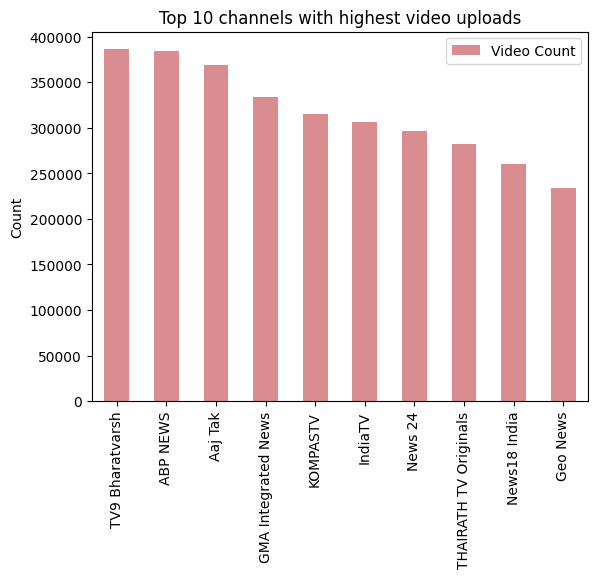

In [26]:
New_data.plot(kind = "bar", title = "Top 10 channels with highest video uploads",ylabel = "Count",color = "#DA8D91")

#5. Top 10 categories with the highest video uploads on YouTube

In [27]:
# Group by Category and sum the Video Count for each category
Videos_uploaded = youtube.groupby("Category")[["Video Count"]].sum()

# Sort the result in descending order and get the top 10 categories
Videos_uploaded = Videos_uploaded.sort_values(by="Video Count", ascending=False).head(10)

# Reset the index so that Category becomes a column
Videos_uploaded = Videos_uploaded.reset_index()

Videos_uploaded


,Category,Video Count
0,News & Politics,4386448
1,Entertainment,3753798
2,People & Blogs,1889762
3,Music,506763
4,Shows,446760
5,Gaming,434361
6,Nonprofits & Activism,224006
7,Sports,200197
8,Film & Animation,168419
9,Education,155826


Plotting bar chart between Categories with the Highest Video Uploads on YouTube

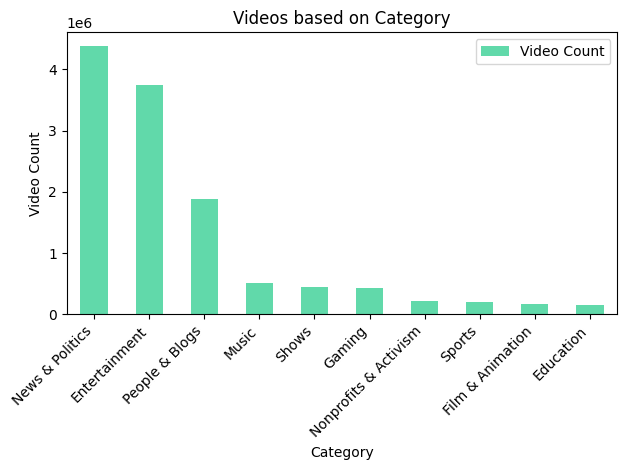

In [28]:
# Plot the graph for the corrected table
Videos_uploaded.plot(
    x="Category",
    y="Video Count",
    kind="bar",
    xlabel="Category",
    ylabel="Video Count",
    title="Videos based on Category",
    color="#61D9AA"
)

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#6.Top 10 Categories with Highest Video Views

In [29]:
Highest_views = youtube.groupby("Category")["Video Views"].max().sort_values(ascending=False).head(10)


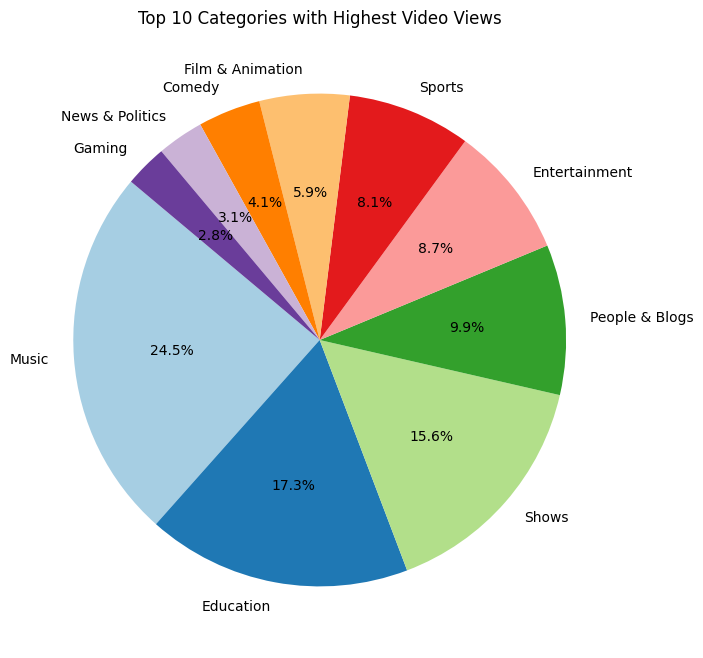

In [30]:
# Calculating percentages
total_views = Highest_views.sum()
percentages = (Highest_views / total_views) * 100

# Creating a DataFrame for the table
table_data = pd.DataFrame({
    'Category': Highest_views.index,
    'Video Views': Highest_views.values,
    'Percentage (%)': percentages.values
})
# Creating the pie chart
plt.figure(figsize=(8,8))
plt.pie(Highest_views, labels=Highest_views.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Categories with Highest Video Views')
plt.show()

#7.Word Cloud of Categories

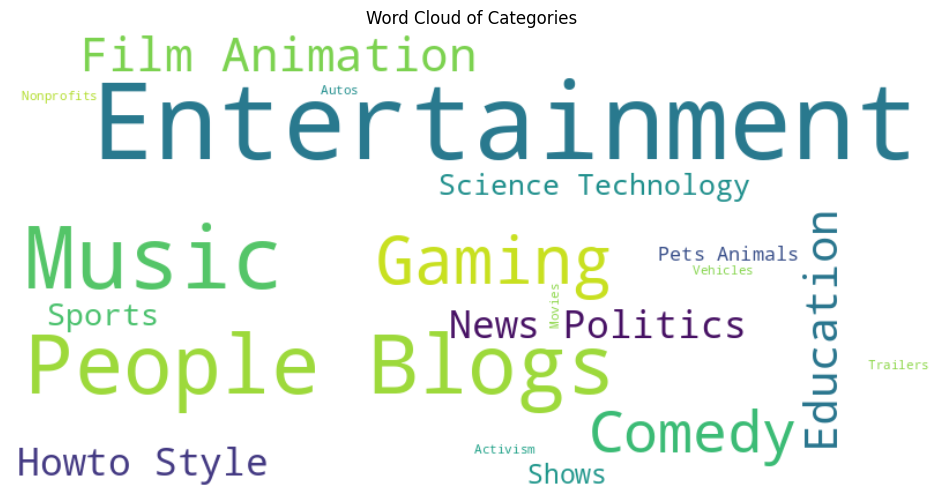

In [31]:
plt.figure(figsize=(12, 6))

# Create a string by joining the 'Category' names (words)
text = ' '.join(youtube['Category'].dropna().tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Categories')
plt.show()
